In [1]:
from sklearn.datasets import fetch_lfw_people


face_data = fetch_lfw_people(min_faces_per_person=80)

X = face_data.data
Y = face_data.target

In [2]:
print('Input data size :', X.shape)
print('Output data size :', Y.shape)
print('Label names:', face_data.target_names)

Input data size : (1140, 2914)
Output data size : (1140,)
Label names: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [5]:
Y[:5]

array([2, 3, 1, 4, 1])

In [6]:
for i in range(5):
    print(f'Class {i} has {(Y == i).sum()} samples.')

Class 0 has 236 samples.
Class 1 has 121 samples.
Class 2 has 530 samples.
Class 3 has 109 samples.
Class 4 has 144 samples.


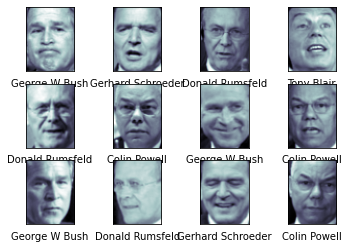

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(face_data.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=face_data.target_names[face_data.target[i]])

plt.show()

In [4]:
 
from sklearn.model_selection import train_test_split


In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(798, 2914)
(798,)
(342, 2914)
(342,)


In [10]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

 the accuracy of the model is : 0.8333333333333334.
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        71
           1       0.76      0.69      0.72        36
           2       0.88      0.91      0.89       159
           3       0.70      0.85      0.77        33
           4       0.87      0.77      0.81        43

    accuracy                           0.83       342
   macro avg       0.80      0.80      0.80       342
weighted avg       0.84      0.83      0.83       342

---------------------------------------------------------
0.8333569182389937
---------------------------------------------------------


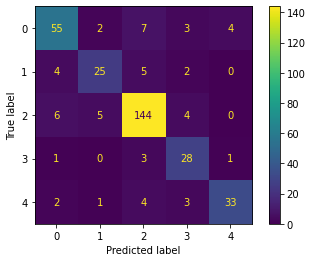

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


model_log=LogisticRegression(multi_class='multinomial')

param_grid=[
    {'penalty':['l1','l2','elasticnet','none'],
    
   }
]

model_grid=GridSearchCV(model_log,param_grid = param_grid,scoring='accuracy',cv=5)

model_grid.fit(X_train, Y_train)

Y_pred=model_grid.predict(X_test)

cfnmx=confusion_matrix(Y_test,Y_pred)
ConfusionMatrixDisplay(cfnmx).plot()
print(f' the accuracy of the model is : {accuracy_score(Y_test, Y_pred)}.')
print('---------------------------------------------------------')
print(classification_report(Y_test, Y_pred))

print('---------------------------------------------------------')
print(model_grid.best_score_)

print('---------------------------------------------------------')

In [7]:
Metrics_log=pd.Series({'Model_Accuracy':accuracy_score(Y_test, Y_pred),'CV best score':model_grid.best_score_})
print(Metrics_log)

Model_Accuracy    0.833333
CV best score     0.833357
dtype: float64


 the accuracy of the model is : 0.8625730994152047.
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        71
           1       0.82      0.75      0.78        36
           2       0.89      0.89      0.89       159
           3       0.83      0.88      0.85        33
           4       0.87      0.79      0.83        43

    accuracy                           0.86       342
   macro avg       0.85      0.84      0.84       342
weighted avg       0.86      0.86      0.86       342

---------------------------------------------------------
0.8483490566037736
---------------------------------------------------------


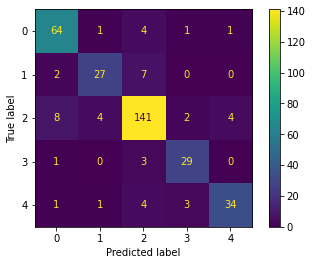

In [13]:
#tuning hyper parameters adding iteration
model_log_tune=LogisticRegression(multi_class='multinomial')

param_grid1=[
    {'penalty':['l1','l2','elasticnet','none'],
   
    'max_iter' : [100,500,1000]}
]

model_grid_tune=GridSearchCV(model_log,param_grid = param_grid1,scoring='accuracy',cv=5)

model_grid_tune.fit(X_train, Y_train)

Y_pred_tune=model_grid_tune.predict(X_test)

cfnmx_tune=confusion_matrix(Y_test,Y_pred_tune)
ConfusionMatrixDisplay(cfnmx_tune).plot()

print(f' the accuracy of the model is : {accuracy_score(Y_test, Y_pred_tune)}.')
print('---------------------------------------------------------')
print(classification_report(Y_test, Y_pred_tune))

print('---------------------------------------------------------')
print(model_grid_tune.best_score_)

print('---------------------------------------------------------')


In [14]:
Metrics_log_tune=pd.Series({'Model_Accuracy':accuracy_score(Y_test, Y_pred_tune),'CV best score':model_grid_tune.best_score_})
print(Metrics_log_tune)

Model_Accuracy    0.862573
CV best score     0.848349
dtype: float64


I have ran three logistic models by tunning the hyperparameters. For the first one, tried the basic regression. Basic logistic model has performed well enough with accuracy of 83.33 percent abd both Precision and recall at 0.80, in later models i have added iterations and solvers model has slightly performed well with accuracy at 85.

Accuracy score for the model is :0.8070175438596491.
----------------
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        71
           1       0.92      0.61      0.73        36
           2       0.75      0.97      0.85       159
           3       0.95      0.58      0.72        33
           4       0.84      0.63      0.72        43

    accuracy                           0.81       342
   macro avg       0.87      0.71      0.77       342
weighted avg       0.83      0.81      0.80       342

----------------
0.7506289308176101


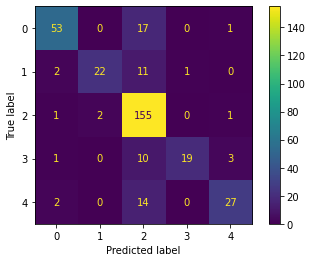

In [8]:
#basic SVC model
from sklearn.svm import SVC
model_svm=SVC(kernel='rbf')

param_grid1=[
    {}
]

model_grid_svc=GridSearchCV(model_svm,param_grid = param_grid1,scoring='accuracy',cv=5)

model_grid_svc.fit(X_train, Y_train)

Y_pred_svc=model_grid_svc.predict(X_test)

cfnmx=confusion_matrix(Y_test,Y_pred_svc)
ConfusionMatrixDisplay(cfnmx).plot()
print(f'Accuracy score for the model is :{accuracy_score(Y_test,Y_pred_svc)}.')
print('----------------')
print(classification_report(Y_test,Y_pred_svc))
print('----------------')
print(model_grid_svc.best_score_)

Accuracy score for the model is :0.4649122807017544.
----------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.00      0.00      0.00        36
           2       0.46      1.00      0.63       159
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        43

    accuracy                           0.46       342
   macro avg       0.09      0.20      0.13       342
weighted avg       0.22      0.46      0.30       342



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


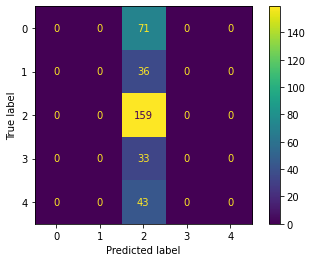

In [11]:
#tunning hyper parameters
model_svm_tune1=SVC()

param_grid1=[{'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
            }
]

model_grid_svc_tune1=GridSearchCV(model_svm_tune1,param_grid = param_grid1,scoring='accuracy',cv=5)

model_grid_svc_tune1.fit(X_train, Y_train)

Y_pred_svc_tune1=model_grid_svc_tune1.predict(X_test)

cfnmx=confusion_matrix(Y_test,Y_pred_svc_tune1)
ConfusionMatrixDisplay(cfnmx).plot()
print(f'Accuracy score for the model is :{accuracy_score(Y_test,Y_pred_svc_tune1)}.')
print('----------------')
print(classification_report(Y_test,Y_pred_svc_tune1))
#print('----------------')
#print(model_grid_svc.best_score_)

**bold text**
SVC model has worked well with default C and gamma values. GridsearchCV with different C and gamma values has worked poorly on the data.



In [12]:
#using neural net #relu
import tensorflow as tf

model_face=tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model_face.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss='sparse_categorical_crossentropy',
              
              metrics=['accuracy'])

model_face.fit(X_train, Y_train, batch_size=150, epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
6/6 [==============================] - 1s 112ms/step - loss: 1073540864.0000 - accuracy: 0.2832 - val_loss: 1.5977 - val_accuracy: 0.4678
Epoch 2/10
6/6 [==============================] - 0s 34ms/step - loss: 1.5805 - accuracy: 0.4649 - val_loss: 1.5471 - val_accuracy: 0.4678
Epoch 3/10
6/6 [==============================] - 0s 28ms/step - loss: 1.5345 - accuracy: 0.4649 - val_loss: 1.5094 - val_accuracy: 0.4678
Epoch 4/10
6/6 [==============================] - 0s 31ms/step - loss: 1.5007 - accuracy: 0.4649 - val_loss: 1.4826 - val_accuracy: 0.4678
Epoch 5/10
6/6 [==============================] - 0s 38ms/step - loss: 1.4763 - accuracy: 0.4649 - val_loss: 1.4633 - val_accuracy: 0.4678
Epoch 6/10
6/6 [==============================] - 0s 29ms/step - loss: 1.4589 - accuracy: 0.4649 - val_loss: 1.4476 - val_accuracy: 0.4678
Epoch 7/10
6/6 [==============================] - 0s 29ms/step - loss: 1.4448 - accuracy: 0.4649 - val_loss: 1.4365 - val_accuracy: 0.4678
Epoch 8/10
6/6 [=

In [13]:
model_face.evaluate(X_test,Y_test)

11/11 [==============================] - 0s 4ms/step - loss: 1.4192 - accuracy: 0.4678


[1.4191762208938599, 0.46783626079559326]

In [14]:
#using neural net #tanh
import tensorflow as tf

model_face=tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model_face.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss='sparse_categorical_crossentropy',
              
              metrics=['accuracy'])

model_face.fit(X_train, Y_train, batch_size=150, epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
6/6 [==============================] - 1s 95ms/step - loss: 3.1984 - accuracy: 0.2920 - val_loss: 3.7783 - val_accuracy: 0.1257
Epoch 2/10
6/6 [==============================] - 0s 41ms/step - loss: 2.1851 - accuracy: 0.3346 - val_loss: 2.7657 - val_accuracy: 0.4649
Epoch 3/10
6/6 [==============================] - 0s 29ms/step - loss: 2.5216 - accuracy: 0.3534 - val_loss: 2.2332 - val_accuracy: 0.4649
Epoch 4/10
6/6 [==============================] - 0s 30ms/step - loss: 2.9999 - accuracy: 0.3258 - val_loss: 3.2851 - val_accuracy: 0.1257
Epoch 5/10
6/6 [==============================] - 0s 33ms/step - loss: 3.3731 - accuracy: 0.2744 - val_loss: 4.8950 - val_accuracy: 0.1257
Epoch 6/10
6/6 [==============================] - 0s 37ms/step - loss: 3.4894 - accuracy: 0.2644 - val_loss: 3.2813 - val_accuracy: 0.2076
Epoch 7/10
6/6 [==============================] - 0s 37ms/step - loss: 2.8302 - accuracy: 0.3258 - val_loss: 3.3129 - val_accuracy: 0.1053
Epoch 8/10
6/6 [===========

In [15]:
model_face.evaluate(X_test,Y_test)

11/11 [==============================] - 0s 3ms/step - loss: 2.2816 - accuracy: 0.1257


[2.281646966934204, 0.1257309913635254]

In [16]:
#using neural net, adding more layers 
import tensorflow as tf

model_face=tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation=tf.nn.tanh),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model_face.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss='sparse_categorical_crossentropy',
              
              metrics=['accuracy'])

model_face.fit(X_train, Y_train, batch_size=150, epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
6/6 [==============================] - 1s 84ms/step - loss: 4.3375 - accuracy: 0.2782 - val_loss: 3.0663 - val_accuracy: 0.4649
Epoch 2/10
6/6 [==============================] - 0s 45ms/step - loss: 3.6322 - accuracy: 0.3258 - val_loss: 3.5797 - val_accuracy: 0.4649
Epoch 3/10
6/6 [==============================] - 0s 46ms/step - loss: 3.2543 - accuracy: 0.3333 - val_loss: 2.9380 - val_accuracy: 0.4649
Epoch 4/10
6/6 [==============================] - 0s 42ms/step - loss: 2.7514 - accuracy: 0.3409 - val_loss: 2.3612 - val_accuracy: 0.4649
Epoch 5/10
6/6 [==============================] - 0s 47ms/step - loss: 2.5509 - accuracy: 0.3484 - val_loss: 2.7188 - val_accuracy: 0.4649
Epoch 6/10
6/6 [==============================] - 0s 37ms/step - loss: 2.3422 - accuracy: 0.3684 - val_loss: 1.7510 - val_accuracy: 0.4649
Epoch 7/10
6/6 [==============================] - 0s 40ms/step - loss: 2.0910 - accuracy: 0.3496 - val_loss: 2.7387 - val_accuracy: 0.4649
Epoch 8/10
6/6 [===========

In [17]:
model_face.evaluate(X_test,Y_test)

11/11 [==============================] - 0s 11ms/step - loss: 1.9842 - accuracy: 0.4649


[1.9842119216918945, 0.4649122953414917]

**Conclusion :**
Neural networks model has poorly performed on this dataset. Tried different activation function and increased dense layers still accuracy has not improved. For this dataset regular ML algortihms like Logistic regrssion and SVC has performed better. Main reason that Neural networks has failed perform is less data. The data has 2914 columns but roughly 1000+ observations. This ratio of data is not good for Neural networks.